# Chapter 2: Probability


In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torch.distributions as dist

print(torch.cuda.is_available())

True


## Multivariate Normal Distribution
\begin{equation}
\mathcal{N}(\boldsymbol{x} | \boldsymbol{\mu}, \boldsymbol{\beta}) = \sqrt{\frac{\operatorname{det}(\boldsymbol{\beta})}{(2 \pi)^{D/2}}} \exp \left(-\frac{1}{2}(\boldsymbol{x}-\boldsymbol{\mu})^{\top} \boldsymbol{\beta}(\boldsymbol{x}-\boldsymbol{\mu})\right) \tag{3.19}
\end{equation}

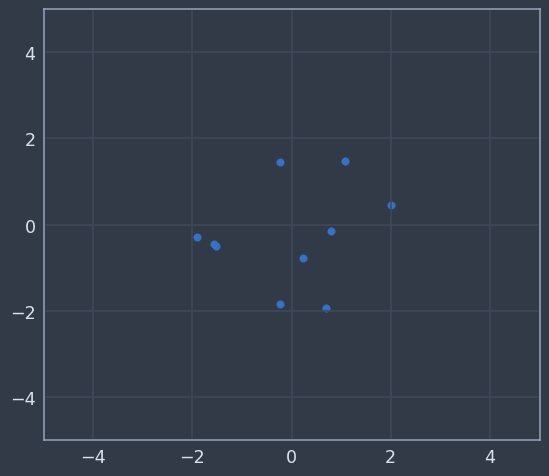

In [2]:
mu = torch.tensor([0, 1], dtype=torch.float32)

# covariance
def mvn_params(D):
    mu = torch.zeros(D)
    cov_matrix = torch.randn(D, D) / D
    cov_matrix = cov_matrix + cov_matrix.t() 
    torch.diagonal(cov_matrix).fill_(1.0)
    return mu, cov_matrix

D = 200
mu, cov = mvn_params(D)
mvn = dist.multivariate_normal.MultivariateNormal(loc=mu, covariance_matrix=cov)

# plot
x = mvn.sample((10,))

fig = plt.figure()
ax = fig.add_subplot(111)#, projection='3d')
ax.scatter(x[:, 0], x[:, 1]) #, x[:, 2], c=x[:, 2])
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
plt.show()

In [3]:
x.shape

torch.Size([10, 200])

In [12]:
mvn.covariance_matrix, D

(tensor([[ 1.0000e+00,  4.1066e-03, -2.1640e-03,  ..., -1.6530e-03,
           3.5306e-04, -7.0833e-03],
         [ 4.1066e-03,  1.0000e+00, -1.2238e-03,  ...,  4.7056e-04,
           8.9894e-03,  7.3992e-03],
         [-2.1640e-03, -1.2238e-03,  1.0000e+00,  ..., -7.4469e-03,
           6.3556e-03,  5.9734e-04],
         ...,
         [-1.6530e-03,  4.7056e-04, -7.4469e-03,  ...,  1.0000e+00,
          -5.6357e-03,  7.4596e-03],
         [ 3.5306e-04,  8.9894e-03,  6.3556e-03,  ..., -5.6357e-03,
           1.0000e+00,  8.4789e-03],
         [-7.0833e-03,  7.3992e-03,  5.9734e-04,  ...,  7.4596e-03,
           8.4789e-03,  1.0000e+00]]),
 200)

## 2.4 The Exponential Family

\begin{equation}
p(\boldsymbol{x} | \boldsymbol{\eta}) = \frac{1}{Z(\boldsymbol{\eta})}h(\boldsymbol{x})\exp[\boldsymbol{\eta}^\top\mathcal{T(\boldsymbol{x})}] \\
= h(\boldsymbol{x})\exp[\boldsymbol{\eta}^\top\mathcal{T(\boldsymbol{x})} - A(\boldsymbol{\eta})]
\end{equation}

## 2.5.3 Probability Integral Transform (PIF)

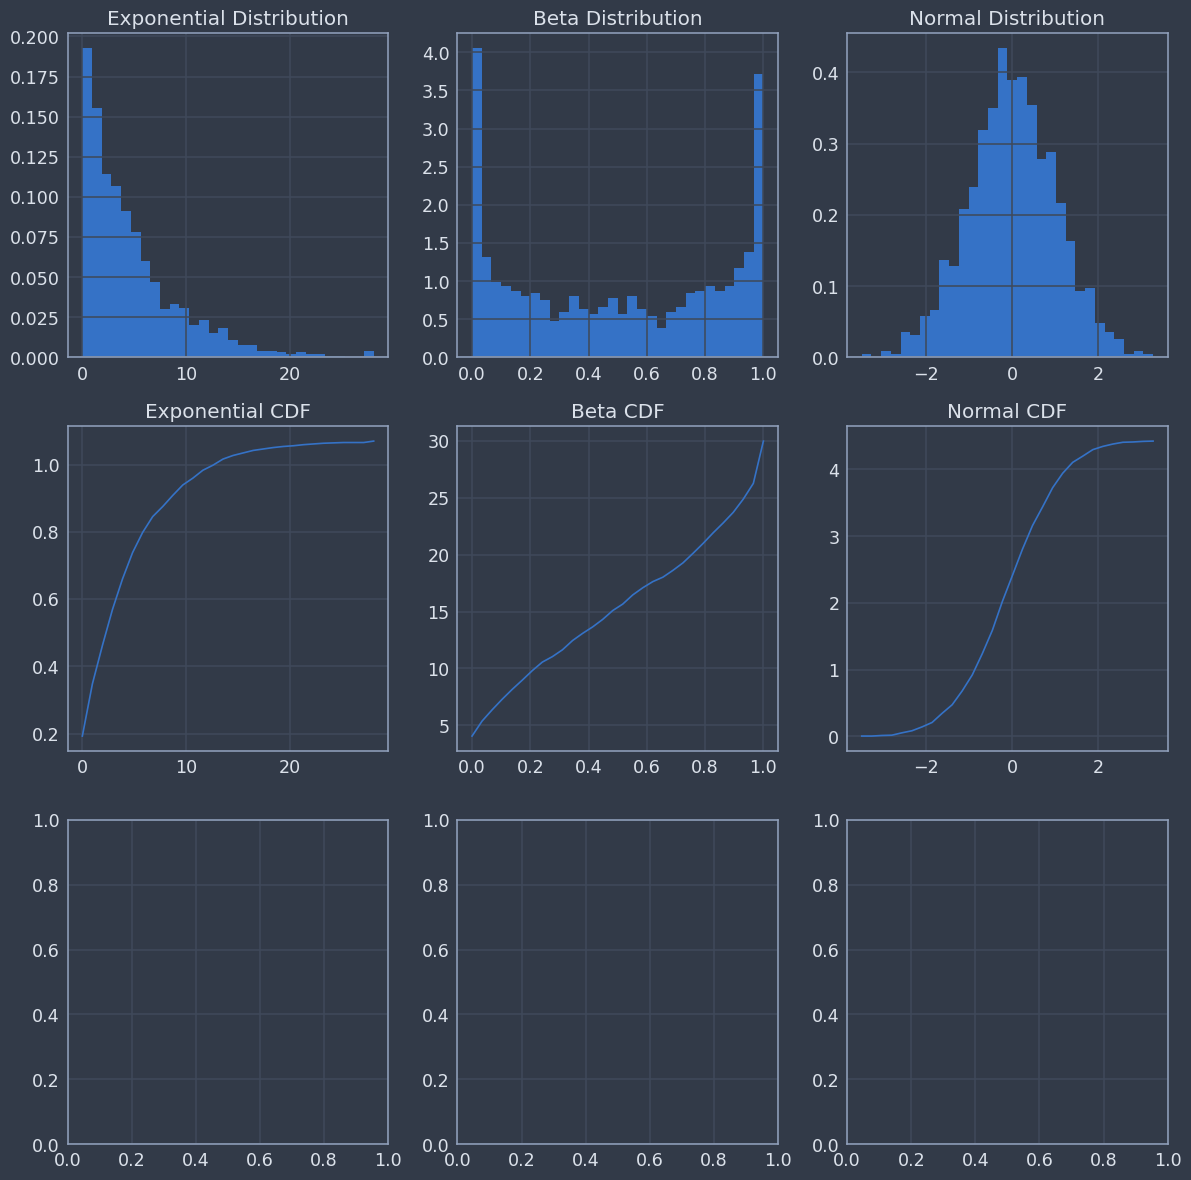

In [57]:
torch.manual_seed(1337)

# Exponential distribution with parameter 5
exp_dist = dist.exponential.Exponential(1 / 5)

# Beta distribution with parameters [0.5, 0.5]
beta_dist = dist.beta.Beta(torch.tensor([0.5]), torch.tensor([0.5]))

# Normal distribution with parameters [0, 1]
normal_dist = dist.normal.Normal(0, 1)

# Generate samples from each distribution
samples_exp = exp_dist.sample((1000,))
samples_beta = beta_dist.sample((1000,))
samples_normal = normal_dist.sample((1000,))

# Plotting the distributions
fig, axes = plt.subplots(3,3, figsize=(12, 12))

# Exponential dist
hist_exp = axes[0,0].hist(samples_exp.numpy(), bins=30, density=True)
axes[0,0].set_title('Exponential Distribution')

axes[1,0].plot(np.linspace(hist_exp[1][0], hist_exp[1][-1], len(hist_exp[0])), np.cumsum(hist_exp[0]))
axes[1,0].set_title('Exponential CDF')

# Beta dist
hist_beta = axes[0,1].hist(samples_beta.numpy(), bins=30, density=True)
axes[0,1].set_title('Beta Distribution')

axes[1,1].plot(np.linspace(hist_beta[1][0], hist_beta[1][-1], len(hist_beta[0])), np.cumsum(hist_beta[0]))
axes[1,1].set_title('Beta CDF')

# Normal dist
hist_norm = axes[0,2].hist(samples_normal.numpy(), bins=30, density=True)
axes[0,2].set_title('Normal Distribution')

axes[1,2].plot(np.linspace(hist_norm[1][0], hist_norm[1][-1], len(hist_norm[0])), np.cumsum(hist_norm[0]))
axes[1,2].set_title('Normal CDF')

plt.tight_layout()
plt.show()

In [48]:
hist_exp[0], np.cumsum(hist_exp[0])

(array([0.1925534 , 0.15511247, 0.1144623 , 0.10697411, 0.09092799,
        0.07809112, 0.05990549, 0.04706862, 0.02995276, 0.03316197,
        0.03102248, 0.0203251 , 0.0235343 , 0.01497637, 0.01818561,
        0.01069741, 0.00748819, 0.00748819, 0.00427897, 0.00427897,
        0.00320922, 0.00213948, 0.00320922, 0.00213948, 0.00213948,
        0.00106974, 0.00106974, 0.        , 0.        , 0.00427897]),
 array([0.1925534 , 0.34766587, 0.46212816, 0.56910227, 0.66003027,
        0.73812139, 0.79802687, 0.84509549, 0.87504825, 0.90821022,
        0.9392327 , 0.9595578 , 0.98309209, 0.99806847, 1.01625408,
        1.02695149, 1.03443967, 1.04192786, 1.04620683, 1.05048579,
        1.05369501, 1.0558345 , 1.05904371, 1.0611832 , 1.06332268,
        1.06439242, 1.06546216, 1.06546216, 1.06546216, 1.06974113]))

In [46]:
np.linspace(hist_exp[1][0], hist_exp[1][0], len(hist_exp[0]))

array([0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068,
       0.00412068, 0.00412068, 0.00412068, 0.00412068, 0.00412068])

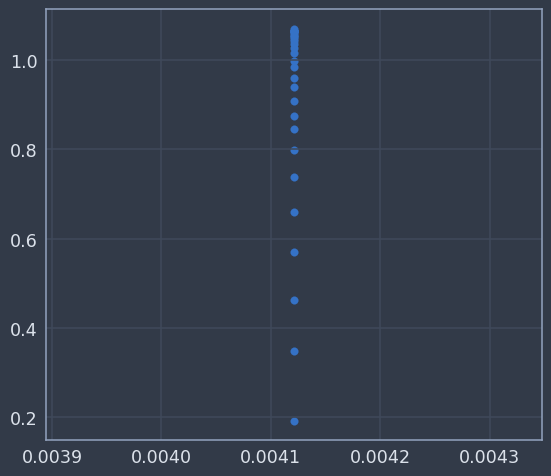

In [54]:
hst = hist_beta
plt.scatter(np.linspace(hist_exp[1][0], hist_exp[1][0], len(hist_exp[0])), np.cumsum(hist_exp[0]))

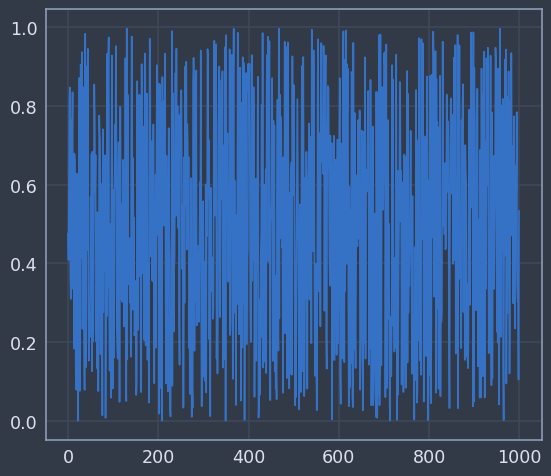

In [24]:
plt.plot(range(len(samples_exp)), exp_dist.cdf(samples_exp))